In [2]:
# import os
# import leafmap
# from samgeo import SamGeo, tms_to_geotiff, get_basemaps


# longitude = -105.52650
# latitude = 40.24359
# m = leafmap.Map(center=[latitude, longitude], zoom=19)
# m.add_basemap("CartoDB.Voyager")

# image = "cropped_N4W351.tif"
# m.layers[-1].visible = False
# m.add_raster(image, layer_name="Image")
# m

In [3]:
from localtileserver import get_leaflet_tile_layer, TileClient
from ipyleaflet import Map
import os
import leafmap
from samgeo import SamGeo, tms_to_geotiff, get_basemaps, overlay_images

image = 'cropped_N4W351.tif'
client = TileClient(image)
t = get_leaflet_tile_layer(client)
m = Map(center=client.center(), zoom=client.default_zoom)
m.add(t)
m

Map(center=[40.2434655, -105.52648450000001], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom…

In [4]:
sam = SamGeo(
    model_type="vit_h",
    checkpoint="sam_vit_h_4b8939.pth",
    sam_kwargs=None
)

In [5]:
mask = "segment.tif"
sam.generate(
    image, mask, batch=True, foreground=True, erosion_kernel=(3, 3), mask_multiplier=255
)

  0%|          | 0/10 [00:19<?, ?it/s]


KeyboardInterrupt: 

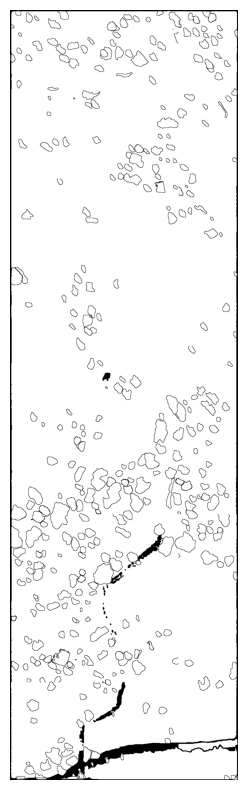

In [ ]:
sam.show_masks(cmap="binary_r")

In [ ]:
vector = "segment.gpkg"
sam.tiff_to_gpkg(mask, vector, simplify_tolerance=None)

In [ ]:
shapefile = "segment.shp"
sam.tiff_to_vector(mask, shapefile)

In [ ]:
leafmap.image_comparison(
    image,
    "segment.tif",
    label1="Image",
    label2="Image Segmentation",
)

NameError: name 'leafmap' is not defined

In [ ]:
overlay_images(image, "segment.tif", backend="TkAgg")